# CS 189 HW 6: Neural Networks
**Note:** before starting this notebook, please make a copy of it, otherwise your changes will not persist.

This part of the assignment is designed to get you familiar with how engineerings in the real world train neural network systems. It isn't designed to be difficult. In fact, everything you need to complete the assignment is available directly on the pytorch website [here](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html). This note book will have the following components:

1. Understanding the basics of Pytorch (no deliverables)
2. Training a simple neural network on MNIST (Deliverable = training graphs)
3. Train a model on CIFAR-10 for Kaggle (Deliverable = kaggle submission and explanation of methods)

The last part of this notebook is left open for you to explore as many techniques as you want to do as well as possible on the dataset.

You will also get practice being an ML engineer by reading documentation and using it to implement models. The first section of this notebook will cover an outline of what you need to know -- we are confident that you can find the rest on your own.

Note that like all other assignments, you are free to use this notebook or not. You just need to complete the deliverables and turn in your code. If you want to run everything outside of the notebook, make sure to appropriately install pytorch to download the datasets and copy out the code for kaggle submission. If you don't want to use pytorch and instead want to use Tensorflow, feel free, but you may still need to install pytorch to download the datasets.


In [1]:
# Imports for pytorch
import numpy as np
import torch
import torchvision
from torch import nn
import matplotlib
from matplotlib import pyplot as plt
import tqdm

## Task 1: MLP For FashionMNIST
Earlier in this course you trained SVMs and GDA models on MNIST. Now you will train a multi-layer perceptron model on an MNIST-like dataset. Your deliverables are as follows:

1. Code for training an MLP on MNIST (can be in code appendix, tagged in your submission).
2. A plot of the training loss and validation loss for each epoch of training after trainnig for at least 8 epochs.
3. A plot of the training and validation accuracy, showing that it is at least 82% for validation by the end of training. 

Below we will create the training and validation datasets for you, and provide a very basic skeleton of the code. Please leverage the example training loop from above.

Some pytorch components you should definetily use:
1. `nn.Linear`
2. Some activation: `nn.ReLU`, `nn.Tanh`, `nn.Sigmoid`, etc.
3. `nn.CrossEntropyLoss`

Here are challenges you will need to overcome:
1. The data is default configured in image form ie (28 x 28), versus one feature vector. You will need to reshape it somewhere to feed it in as vector to the MLP. There are many ways of doing this.
2. You need to write code for plotting.
3. You need to find appropriate hyper-parameters to achieve good accuracy.

Your underlying model must be fully connected or dense, and may not have convolutions etc., but you can use anything in torch.optim or any layers in torch.nn besides nn.Linear that do not have weights. 

In [7]:
# Creating the datasets
torch.manual_seed(14)
np.random.seed(14)

transform = torchvision.transforms.ToTensor() # feel free to modify this as you see fit.

training_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

validation_data = torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

Using device cuda


<ipython-input-8-fc5cee071d5b>:52: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x, y in tqdm.tqdm_notebook(dataloader_train, unit="batch"):


  0%|          | 0/2400 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 0.7119939461350441


<ipython-input-8-fc5cee071d5b>:75: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x, y in tqdm.tqdm_notebook(dataloader_validation, unit="batch"):


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/2400 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 0.4284349411105116


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/2400 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 0.37807532529501864


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/2400 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 0.3492210277542472


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/2400 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 0.3275916560133919


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/2400 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 0.3116871548436272


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/2400 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 0.29909535812214016


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/2400 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 0.28694016217564544


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/2400 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 0.27706700849734867


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/2400 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 0.2681822696933523


  0%|          | 0/400 [00:00<?, ?batch/s]

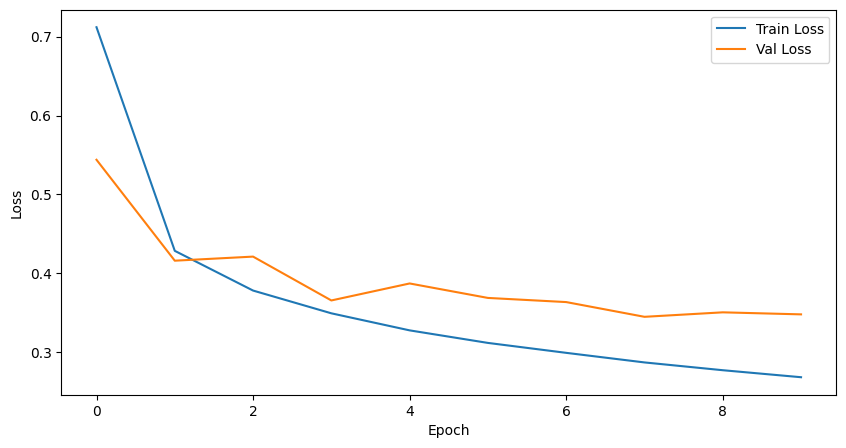

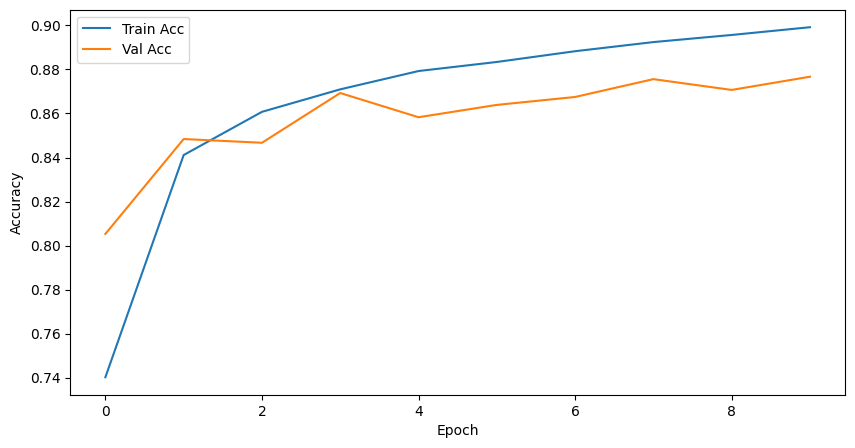

In [8]:
### YOUR CODE HERE ###
class MLP(nn.Module):
  def __init__(self, input, hidden, output):
    super(MLP, self).__init__()
    self.input = nn.Linear(input, hidden)
    self.hidden1 = nn.Linear(hidden, hidden)
    self.hidden2 = nn.Linear(hidden, hidden)
    self.output = nn.Linear(hidden, output)

    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
   

  def forward(self, x):
    x = self.relu(self.input(x))
    x = self.relu(self.hidden1(x))
    x = self.relu(self.hidden2(x))
    x = self.output(x)
    return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

num_epochs = 10
batch_size = 25
learning_rate = 0.05
input = 784
hidden = 128
output = 10


model = MLP(input, hidden, output).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()
dataloader_train = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
dataloader_validation = torch.utils.data.DataLoader(validation_data, batch_size=batch_size, shuffle=False)


train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):

    torch.manual_seed(epoch)
    np.random.seed(epoch)

    training_losses = []
    num_correct = 0
    num_samples = 0
    model.train()
    for x, y in tqdm.tqdm_notebook(dataloader_train, unit="batch"):
        x = x.reshape(-1, 784)
        x, y = x.float().to(device), y.long().to(device)
        optimizer.zero_grad() 
        pred = model(x)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        training_losses.append(loss.item())
        answer = torch.argmax(pred, axis = 1)
        num_correct += torch.sum(torch.round(answer) == y).item()
        num_samples += len(y)

    print("Finished Epoch", epoch + 1, ", training loss:", np.mean(training_losses))
    
    train_losses.append(np.mean(training_losses))
    train_accs.append(num_correct / num_samples)

    validation_losses = []
    num_correct = 0
    num_samples = 0
    model.eval() 
    with torch.no_grad():
        for x, y in tqdm.tqdm_notebook(dataloader_validation, unit="batch"):
            x = x.reshape(-1, 784)
            x, y = x.float().to(device), y.long().to(device)
            pred = model(x)
            loss = criterion(pred, y)
            validation_losses.append(loss.item())
            answer = torch.argmax(pred, axis = 1)
            num_correct += torch.sum(torch.round(answer) == y).item()
            num_samples += len(y)

    val_losses.append(np.mean(validation_losses))
    val_accs.append(num_correct / num_samples)

# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Task 2: CNNs for CIFAR-10

In this section, you will create a CNN for the CIFAR dataset, and submit your predictions to Kaggle. It is recommended that you use GPU acceleration for this part.

Here are some of the components you should consider using:
1. `nn.Conv2d`
2. `nn.ReLU`
3. `nn.Linear`
4. `nn.CrossEntropyLoss`
5. `nn.MaxPooling2d` (though many implementations without it exist)

We encourage you to explore different ways of improving your model to get higher accuracy. Here are some suggestions for things to look into:
1. CNN architectures: AlexNet, VGG, ResNets, etc.
2. Different optimizers and their parameters (see torch.optim)
3. Image preprocessing / data augmentation (see torchvision.transforms)
4. Regularization or dropout (see torch.optim and torch.nn respectively)
5. Learning rate scheduling: https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
6. Weight initialization: https://pytorch.org/docs/stable/nn.init.html

Though we encourage you to explore, there are some rules:
1. You are not allowed to install or use packages not included by default in the Colab Environment.
2. You are not allowed to use any pre-defined architectures or feature extractors in your network.
3. You are not allowed to use **any** pretrained weights, ie no transfer learning.
4. You cannot train on the test data.

Otherwise everything is fair game.

Your deliverables are as follows:
1. Submit to Kaggle and include your test accuracy in your report.
2. Provide at least (1) training curve for your model, depicting loss per epoch or step after training for at least 8 epochs.
3. Explain the components of your final model, and how you think your design choices contributed to it's performance.

After you write your code, we have included skeleton code that should be used to submit predictions to Kaggle. **You must follow the instructions below under the submission header**. Note that if you apply any processing or transformations to the data, you will need to do the same to the test data otherwise you will likely achieve very low accuracy. 

It is expected that this task will take a while to train. Our simple solution achieves a training accuracy of 90.2% and a test accuracy of 74.8% after 10 epochs (be careful of overfitting!). This easily beats the best SVM based CIFAR10 model submitted to the HW 1 Kaggle! It is possible to achieve 95% or higher test accuracy on CIFAR 10 with good model design and tuning.

In [9]:
# Creating the datasets, feel free to change this as long as you do the same to the test data.
# You can also modify this to split the data into training and validation.
# See https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split


# transform = torchvision.transforms.ToTensor()

##This is common knowledge on the internet. These mean and stds can be found in many different places,
# including on stack overflow and multiple different webistes.
##I specifically pulled the normalization and transformation code from
# here: https://blog.paperspace.com/alexnet-pytorch/#alexnet

torch.manual_seed(14)
np.random.seed(14)

normalize = torchvision.transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],
    )

transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomCrop(32, padding=4),
    torchvision.transforms.ToTensor(),
    normalize
])


training_data = torchvision.datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transform,
)
# If you make a train-test partition it is up to you.


100%|██████████| 170498071/170498071 [00:13<00:00, 12927477.30it/s]


Extracting data/cifar-10-python.tar.gz to data


Using device cuda


<ipython-input-10-d4e212974fc6>:78: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x, y in tqdm.tqdm_notebook(train_loader, unit="batch"):


  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 1 , training loss: 1.9796929095685483


<ipython-input-10-d4e212974fc6>:101: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x, y in tqdm.tqdm_notebook(val_loader, unit="batch"):


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 2 , training loss: 1.6278045217692851


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 3 , training loss: 1.4550744726136327


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 4 , training loss: 1.304924963377416


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 5 , training loss: 1.1780716593191027


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 6 , training loss: 1.0738607878237962


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 7 , training loss: 1.0004570993222297


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 8 , training loss: 0.9382733288221061


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 9 , training loss: 0.8883121054805815


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 10 , training loss: 0.8465269927773624


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 11 , training loss: 0.8131318215001374


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 12 , training loss: 0.7772211647685617


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 13 , training loss: 0.7450838886015118


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 14 , training loss: 0.7185254330094903


  0%|          | 0/400 [00:00<?, ?batch/s]

  0%|          | 0/1600 [00:00<?, ?batch/s]

Finished Epoch 15 , training loss: 0.6934482907410711


  0%|          | 0/400 [00:00<?, ?batch/s]

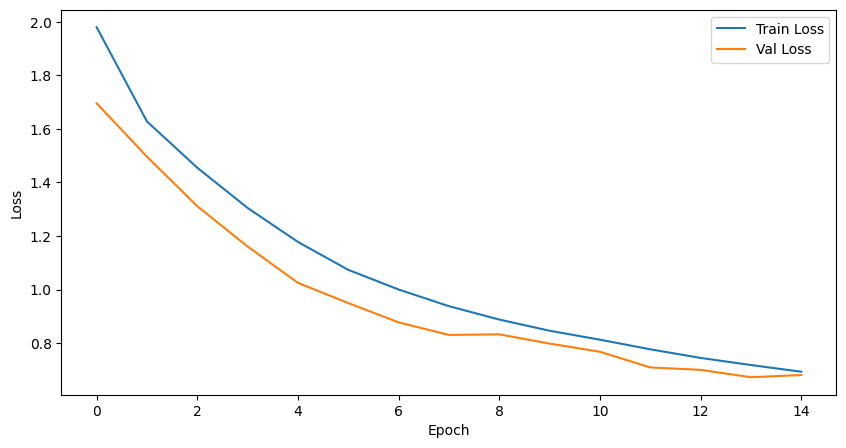

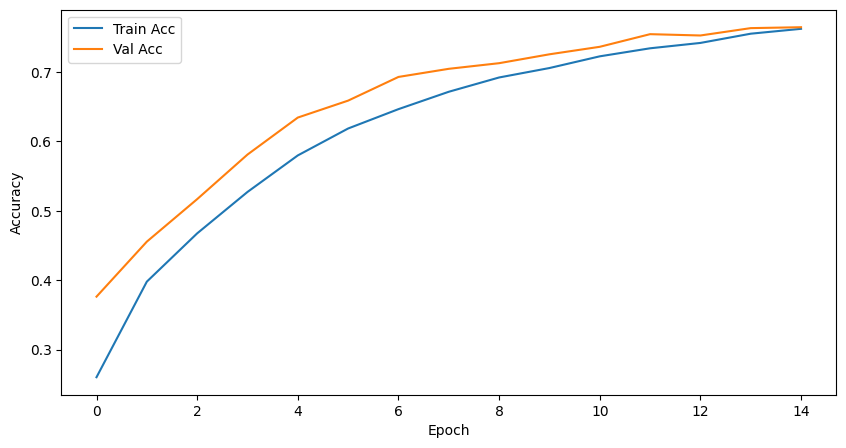

Final Training Accuracy: 0.762
Final Validation Accuracy: 0.7643


In [10]:
### YOUR CODE HERE ###
torch.manual_seed(14)
np.random.seed(14)

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    #32x32x3 -> #32x32x27
    self.conv1 = nn.Conv2d(3, 27, kernel_size=3, stride=1, padding=1)
    #32x32x27 - > #32x32x81
    self.conv2 = nn.Conv2d(27, 81, kernel_size=3, padding=1)
    #32x32x81 -> #16x16x81
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    #16x16x81 -> 16x16x243
    self.conv3 = nn.Conv2d(81, 243, kernel_size=3, padding=1)
    # 16x16x243 ->  8x8x243
    self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
    
    self.layer1 = nn.Linear(8 * 8 * 243, 8 * 8 * 8)
    self.layer2 = nn.Linear(8 * 8 * 8, 8 * 8)
    self.layer3 = nn.Linear(8 * 8, 10)

    self.relu = nn.ReLU()
    self.dropout1 = nn.Dropout(p=0.5)
    self.dropout2 = nn.Dropout(p=0.25)

  def forward(self, x):
      x = self.relu(self.conv1(x))
      x = self.relu(self.conv2(x))
      x = self.pool(x)
      x = self.relu(self.conv3(x))
      x = self.pool(x)
      x = x.view(x.size(0), -1)
      x = self.dropout1(self.relu(self.layer1(x))) 
      x = self.dropout2(self.relu(self.layer2(x)))
      x = self.layer3(x)
      return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)

num_epochs = 15
batch_size = 25
learning_rate = 0.002


model = CNN().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = .9)
criterion = torch.nn.CrossEntropyLoss()

train_size = int(0.8 * len(training_data))
val_size = len(training_data) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(training_data, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False)


train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(num_epochs):

    torch.manual_seed(epoch)
    np.random.seed(epoch)

    training_losses = []
    num_correct = 0
    num_samples = 0
    model.train()
    for x, y in tqdm.tqdm_notebook(train_loader, unit="batch"):
        
        x, y = x.float().to(device), y.long().to(device)
        optimizer.zero_grad()
        pred = model(x)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        training_losses.append(loss.item())
        answer = torch.argmax(pred, axis = 1)
        num_correct += torch.sum(torch.round(answer) == y).item()
        num_samples += len(y)

    print("Finished Epoch", epoch + 1, ", training loss:", np.mean(training_losses))
    
    train_losses.append(np.mean(training_losses))
    train_accs.append(num_correct / num_samples)

    validation_losses = []
    num_correct = 0
    num_samples = 0
    model.eval() 
    with torch.no_grad():
        for x, y in tqdm.tqdm_notebook(val_loader, unit="batch"):
            x, y = x.float().to(device), y.long().to(device)
            pred = model(x)
            loss = criterion(pred, y)
            validation_losses.append(loss.item())
            answer = torch.argmax(pred, axis = 1)
            num_correct += torch.sum(torch.round(answer) == y).item()
            num_samples += len(y)

    val_losses.append(np.mean(validation_losses))
    val_accs.append(num_correct / num_samples)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print("Final Training Accuracy: " + str(train_accs[-1]))
print("Final Validation Accuracy: " + str(val_accs[-1]))









### Kaggle Submission
The following code is for you to make your submission to kaggle. Here are the steps you must follow:

1. Upload `cifar_test_data.npy` to the colab notebook by going to files on the right hand pane, then hitting "upload". 
2. Run the following cell to generate the dataset object for the test data. Feel free to modify the code to use the same transforms that you use for the training data. By default, this will re-use the `transform` variable.
3. In the second cell, write code to run predictions on the testing dataset and store them into an array called `predictions`.
4. Run the final cell which will convert your predictions array into a CSV for kaggle.
5. Go to the files pane again, and download the file called `submission.csv` by clicking the three dots and then download.


In [12]:
from PIL import Image
import os

class CIFAR10Test(torchvision.datasets.VisionDataset):
    
    def __init__(self, transform=None, target_transform=None):
        super(CIFAR10Test, self).__init__(None, transform=transform,
                                      target_transform=target_transform)
        assert os.path.exists("/content/cifar10_test_data_sp23.npy"), "You must upload the test data to the file system."
        self.data = [np.load("/content/cifar10_test_data_sp23.npy", allow_pickle=False)]

        self.data = np.vstack(self.data).reshape(-1, 3, 32, 32)
        self.data = self.data.transpose((0, 2, 3, 1))  # convert to HWC

    def __getitem__(self, index: int):
        img = self.data[index]
        img = Image.fromarray(img)
        if self.transform is not None:
            img = self.transform(img)
        return img

    def __len__(self) -> int:
        return len(self.data)
        
### YOUR CODE HERE ###
normalize = torchvision.transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010],
    )

transform = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomCrop(32, padding=4),
    torchvision.transforms.ToTensor(),
    normalize
])
# Create the test dataset
testing_data = CIFAR10Test(
    transform=transform, # NOTE: Make sure transform is the same as used in the training dataset.
)

In [13]:
# Recommendation: create a `test_dataloader` from torch.utils.data.DataLoader with `shuffle=False` to iterate over the test data in batches.
test_dataloader = torch.utils.data.DataLoader(
    testing_data,
    batch_size=batch_size,
    shuffle=False)


predictions = []

model.eval() # Put model in eval mode
with torch.no_grad():
    for x in tqdm.tqdm_notebook(test_dataloader, unit="batch"):
        
        x = x.float().to(device)
        pred = model(x)
        preds = torch.argmax(pred, axis = 1)
        predictions = predictions + preds.tolist()

val_losses.append(np.mean(validation_losses))
val_accs.append(num_correct / num_samples)
# Store a numpy vector of the predictions for the test set in the variable `predictions`.


<ipython-input-13-3121adc0d5bf>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm.tqdm_notebook(test_dataloader, unit="batch"):


  0%|          | 0/400 [00:00<?, ?batch/s]

In [14]:
# This code below will generate kaggle_predictions.csv file. Please download it and submit to kaggle.
import pandas as pd

if isinstance(predictions, np.ndarray):
    predictions = predictions.astype(int)
else:
    predictions = np.array(predictions, dtype=int)
assert predictions.shape == (len(testing_data),), "Predictions were not the correct shape"
df = pd.DataFrame({'Category': predictions})
df.index += 1  # Ensures that the index starts at 1. 
df.to_csv('submission.csv', index_label='Id')

# Now download the submission.csv file to submit.

Congrats! You made it to the end.

In [ ]:
print(os.getcwd())


/content
